## **DeepFake Detection - Milestone 1**


This notebook explores the DeepFake detection dataset, performs preprocessing, and proposes a methodology for further analysis.

### **1. Dataset Description and Features**

**Dataset Description**

The dataset used for this project is a collection of real and fake (deepfake) facial images. The dataset was obtained from Kaggle's "Deepfake Detection Challenge" which aims to accelerate the development of technologies to detect manipulated media. Deepfakes are synthetic media where a person's likeness is replaced with someone else's using artificial intelligence techniques.


 **Features**

The dataset consists of image files organized into the following structure:
- Real images: Authentic facial images without manipulation
- Fake images: Manipulated facial images created using deepfake technology

Each image has the following characteristics:
1. Pixel values (numerical): RGB values ranging from 0-255 for each pixel
2. Image size: 224x224 pixels (after preprocessing)
3. Labels (categorical): Real (1) or Fake (0)

### **2. Preprocessing with Pandas**

In [ ]:
# Install required packages
# pip install pandas numpy matplotlib seaborn pillow opencv-python scikit-learn


In [7]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split

# Set plotting style
plt.style.use('ggplot')
%matplotlib inline

### Load the Data
Since we are working with image data stored in files, we'll create a DataFrame that contains image paths and labels.

In [8]:
# Define paths
base_path = os.path.join('..', 'Dataset Trimmed', 'Dataset Trimmed')
real_dir = os.path.join(base_path, 'train', 'real')
fake_dir = os.path.join(base_path, 'train', 'fake')

# Verify paths exist
print(f"Real directory exists: {os.path.exists(real_dir)}")
print(f"Fake directory exists: {os.path.exists(fake_dir)}")

Real directory exists: True
Fake directory exists: True


In [9]:
# Create a function to load image data
def load_images_to_df(real_dir, fake_dir):
    data = []
    
    # Load real images
    for filename in os.listdir(real_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            data.append({
                'image_path': os.path.join(real_dir, filename),
                'label': 'Real',
                'filename': filename
            })
    
    # Load fake images
    for filename in os.listdir(fake_dir):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            data.append({
                'image_path': os.path.join(fake_dir, filename),
                'label': 'Fake',
                'filename': filename
            })
    
    return pd.DataFrame(data)

# Load the data into a DataFrame
df = load_images_to_df(real_dir, fake_dir)

# Display the first few rows
print(df.head())

                                          image_path label     filename
0  ..\Dataset Trimmed\Dataset Trimmed\train\real\...  Real   real_0.jpg
1  ..\Dataset Trimmed\Dataset Trimmed\train\real\...  Real   real_1.jpg
2  ..\Dataset Trimmed\Dataset Trimmed\train\real\...  Real  real_10.jpg
3  ..\Dataset Trimmed\Dataset Trimmed\train\real\...  Real  real_11.jpg
4  ..\Dataset Trimmed\Dataset Trimmed\train\real\...  Real  real_12.jpg


In [10]:
# Check the dimensionality of the DataFrame
print(f"Dataset shape: {df.shape}")

# Check the distribution of labels
print("\nLabel distribution:")
print(df['label'].value_counts())

Dataset shape: (100, 3)

Label distribution:
label
Real    50
Fake    50
Name: count, dtype: int64


### Extract Image Features
Let's extract basic features from the images to create a more comprehensive DataFrame for analysis.

In [ ]:
# Function to extract image features
def extract_image_features(image_path):
    try:
        # Load image
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        
        # Extract features
        height, width, channels = img.shape
        mean_red = np.mean(img[:, :, 0])
        mean_green = np.mean(img[:, :, 1])
        mean_blue = np.mean(img[:, :, 2])
        std_red = np.std(img[:, :, 0])
        std_green = np.std(img[:, :, 1])
        std_blue = np.std(img[:, :, 2])
        brightness = np.mean(img)
        
        return {
            'height': height,
            'width': width,
            'channels': channels,
            'mean_red': mean_red,
            'mean_green': mean_green,
            'mean_blue': mean_blue,
            'std_red': std_red,
            'std_green': std_green,
            'std_blue': std_blue,
            'brightness': brightness
        }
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Sample a subset of images to extract features (to save time)
sample_df = df.sample(n=min(50, len(df)), random_state=42)

# Extract features for the sampled images
features_list = []
for idx, row in sample_df.iterrows():
    features = extract_image_features(row['image_path'])
    if features:
        features['image_path'] = row['image_path']
        features['label'] = row['label']
        features['filename'] = row['filename']
        features_list.append(features)

# Create a new DataFrame with extracted features
features_df = pd.DataFrame(features_list)


features_df.head()

   height  width  channels    mean_red  mean_green   mean_blue    std_red  \
0     256    256         3  132.077698  102.015213   86.555771  87.616798   
1     256    256         3  150.135010  137.749039  133.449341  76.127776   
2     256    256         3  101.420105   64.588684   43.247177  48.803101   
3     256    256         3  184.510666  163.905548  133.281921  66.707881   
4     256    256         3   57.301193   53.012207   53.911636  72.353660   

   std_green   std_blue  brightness  \
0  70.517742  63.215179  106.882894   
1  73.138622  71.006061  140.444463   
2  39.407205  33.334698   69.751989   
3  72.947955  71.013199  160.566045   
4  63.454499  63.179394   54.741679   

                                          image_path label     filename  
0  ..\Dataset Trimmed\Dataset Trimmed\train\fake\...  Fake  fake_39.jpg  
1  ..\Dataset Trimmed\Dataset Trimmed\train\fake\...  Fake  fake_11.jpg  
2  ..\Dataset Trimmed\Dataset Trimmed\train\fake\...  Fake  fake_27.jpg  
3  ..\

### Missing Values
Let's check for missing values in our features DataFrame.

In [12]:
# Check for missing values
missing_values = features_df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Calculate percentage of missing values
missing_percentage = (missing_values / len(features_df)) * 100
print("\nPercentage of missing values per column:")
print(missing_percentage)

Missing values per column:
height        0
width         0
channels      0
mean_red      0
mean_green    0
mean_blue     0
std_red       0
std_green     0
std_blue      0
brightness    0
image_path    0
label         0
filename      0
dtype: int64

Percentage of missing values per column:
height        0.0
width         0.0
channels      0.0
mean_red      0.0
mean_green    0.0
mean_blue     0.0
std_red       0.0
std_green     0.0
std_blue      0.0
brightness    0.0
image_path    0.0
label         0.0
filename      0.0
dtype: float64


In [13]:
# Fill any missing values with appropriate statistics
numerical_cols = ['height', 'width', 'channels', 'mean_red', 'mean_green', 'mean_blue', 
                 'std_red', 'std_green', 'std_blue', 'brightness']

for col in numerical_cols:
    if features_df[col].isnull().sum() > 0:
        # Fill missing values with the median
        features_df[col].fillna(features_df[col].median(), inplace=True)

# Verify no missing values remain
print("Missing values after imputation:")
print(features_df.isnull().sum())

Missing values after imputation:
height        0
width         0
channels      0
mean_red      0
mean_green    0
mean_blue     0
std_red       0
std_green     0
std_blue      0
brightness    0
image_path    0
label         0
filename      0
dtype: int64


### Outliers
Let's identify and handle outliers in our numeric features.

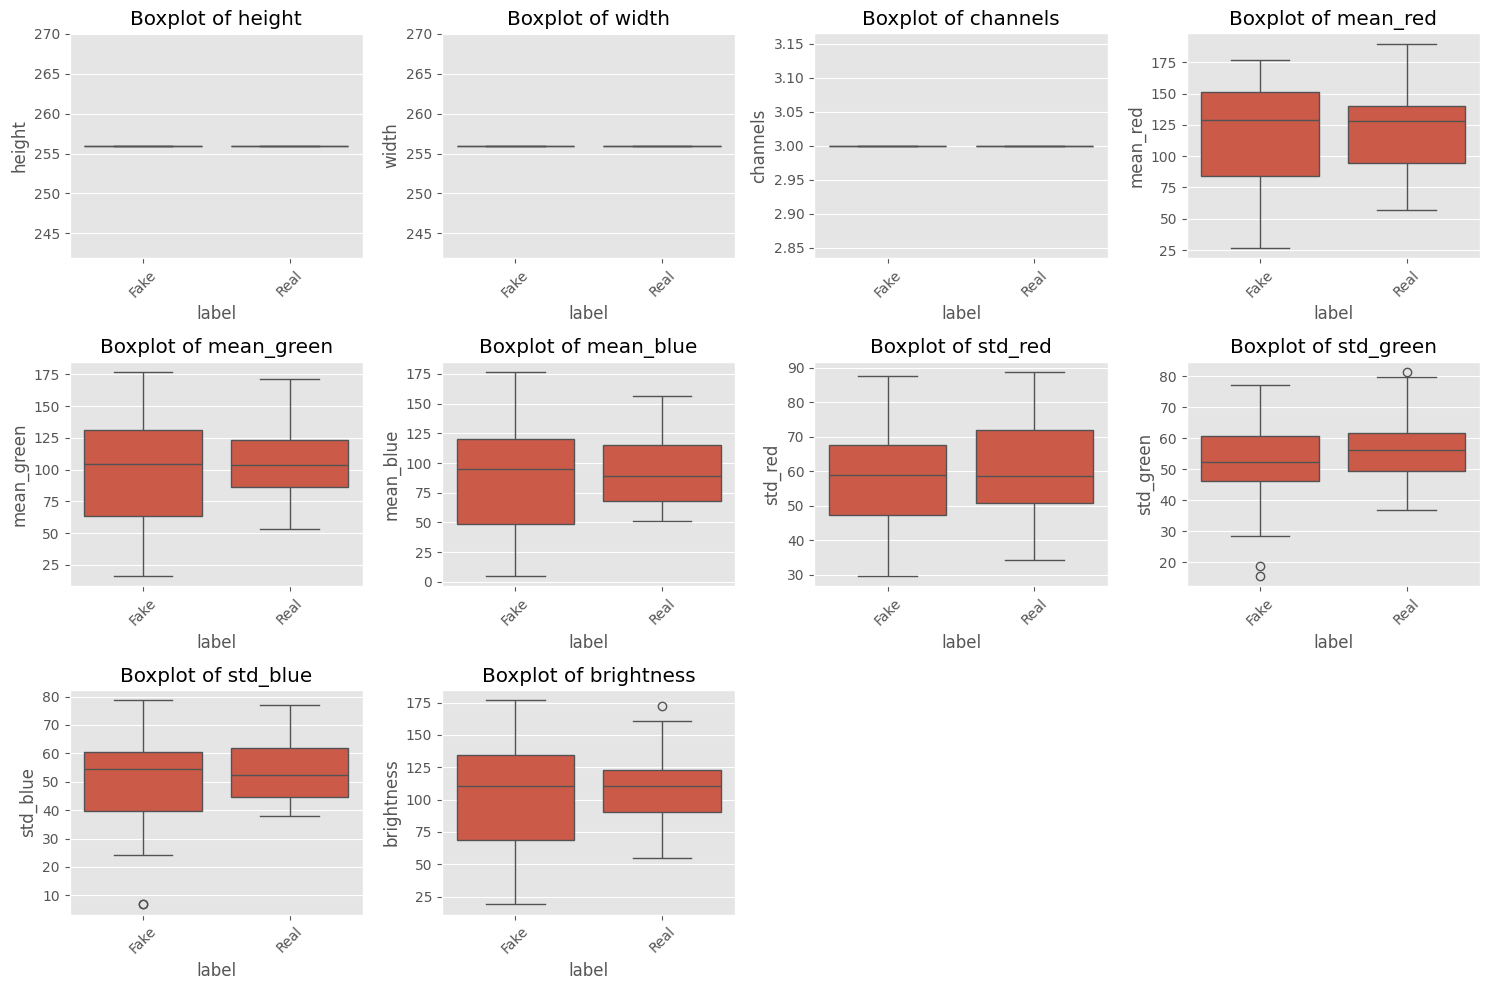

In [14]:
# Create box plots to visualize potential outliers
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='label', y=col, data=features_df)
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

In [15]:
# Function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers for each numerical column
outlier_summary = []

for col in numerical_cols:
    outliers, lower, upper = detect_outliers(features_df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(features_df)) * 100
    
    outlier_summary.append({
        'column': col,
        'outlier_count': outlier_count,
        'outlier_percentage': outlier_percentage,
        'lower_bound': lower,
        'upper_bound': upper
    })

# Display outlier summary
outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df)

       column  outlier_count  outlier_percentage  lower_bound  upper_bound
0      height              0                 0.0   256.000000   256.000000
1       width              0                 0.0   256.000000   256.000000
2    channels              0                 0.0     3.000000     3.000000
3    mean_red              0                 0.0    -8.560095   245.050089
4  mean_green              0                 0.0    -7.789402   204.538601
5   mean_blue              0                 0.0    -8.577883   190.362623
6     std_red              0                 0.0    17.932609   101.256177
7   std_green              4                 8.0    29.017555    81.224162
8    std_blue              2                 4.0    15.965773    89.482205
9  brightness              0                 0.0    -2.327678   200.546798


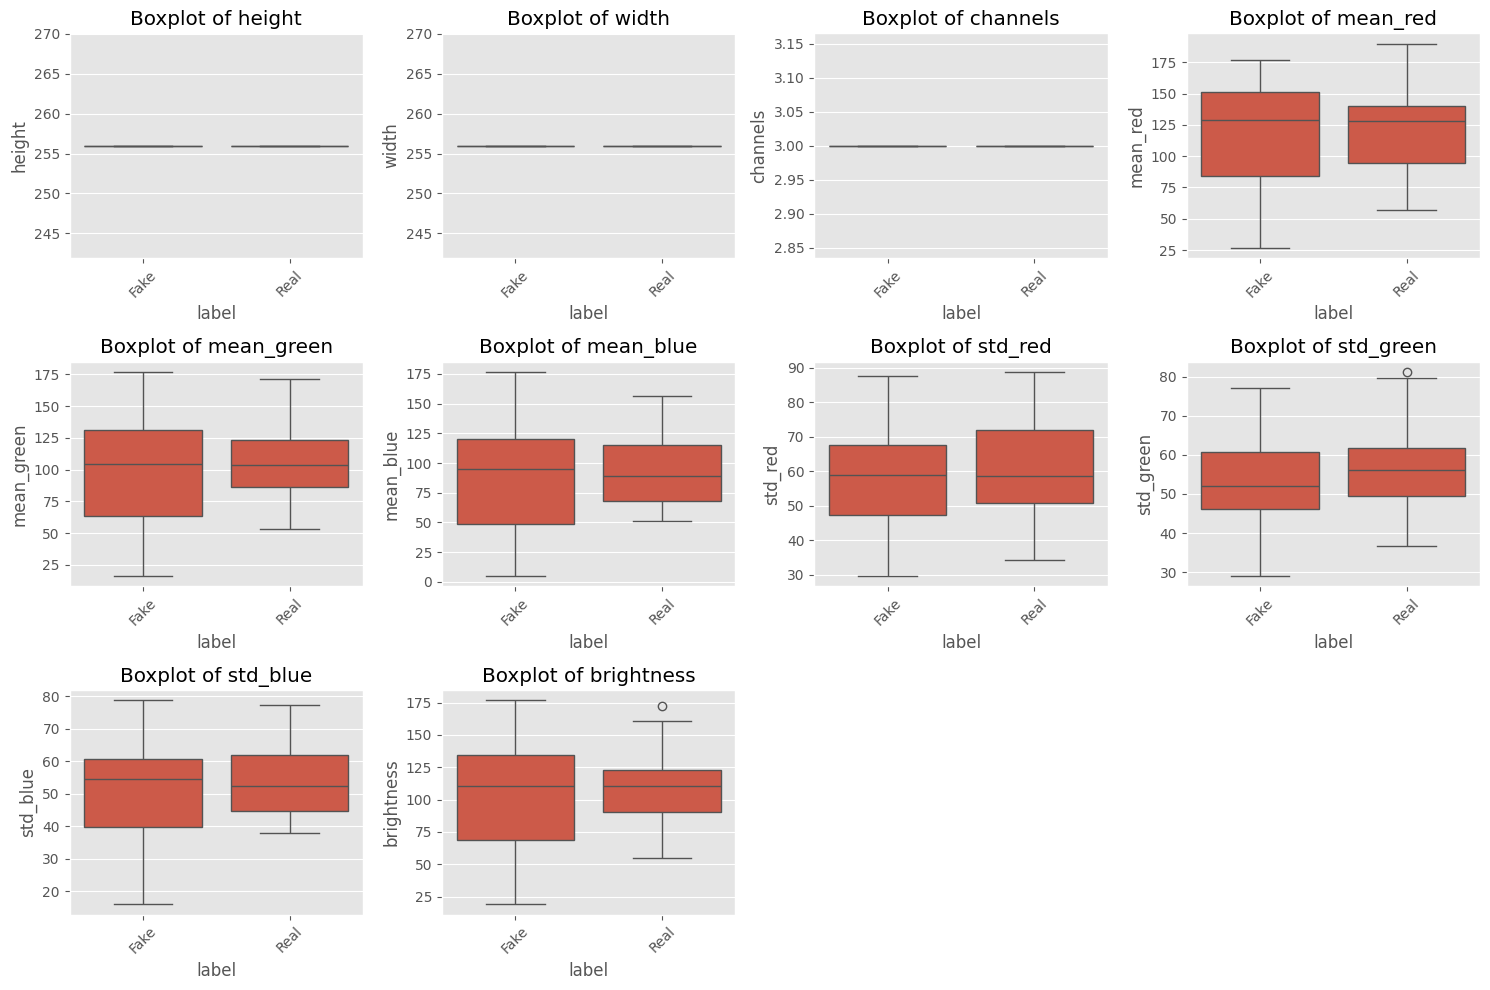

In [31]:
# Handle outliers using capping
for col in numerical_cols:
    _, lower_bound, upper_bound = detect_outliers(features_df, col)
    
    # Cap the outliers
    features_df[col] = features_df[col].clip(lower=lower_bound, upper=upper_bound)

# Verify outliers have been handled
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x='label', y=col, data=features_df)
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('boxplots_after_handling.png')
plt.show()

### Data Type Conversion
Let's ensure our data types are appropriate.

In [17]:
# Check current data types
print("Data types before conversion:")
print(features_df.dtypes)

# Convert 'label' to categorical
features_df['label'] = features_df['label'].astype('category')

# Ensure numerical columns are of numeric type
for col in numerical_cols:
    features_df[col] = pd.to_numeric(features_df[col])

# Check updated data types
print("\nData types after conversion:")
print(features_df.dtypes)

Data types before conversion:
height          int64
width           int64
channels        int64
mean_red      float64
mean_green    float64
mean_blue     float64
std_red       float64
std_green     float64
std_blue      float64
brightness    float64
image_path     object
label          object
filename       object
dtype: object

Data types after conversion:
height           int64
width            int64
channels         int64
mean_red       float64
mean_green     float64
mean_blue      float64
std_red        float64
std_green      float64
std_blue       float64
brightness     float64
image_path      object
label         category
filename        object
dtype: object


### Descriptive Statistics
Let's examine the summary statistics of our numerical features.

In [18]:
# Generate summary statistics for numerical features
descriptive_stats = features_df[numerical_cols].describe()
print(descriptive_stats)

       height  width  channels    mean_red  mean_green   mean_blue    std_red  \
count    50.0   50.0      50.0   50.000000   50.000000   50.000000  50.000000   
mean    256.0  256.0       3.0  119.703081   99.833777   91.461158  59.868852   
std       0.0    0.0       0.0   40.027090   36.614141   37.239725  15.328040   
min     256.0  256.0       3.0   26.925659   16.288025    4.844833  29.613178   
25%     256.0  256.0       3.0   86.543724   71.833599   66.024807  49.178947   
50%     256.0  256.0       3.0  128.102280  104.360252   92.310677  58.696748   
75%     256.0  256.0       3.0  149.946270  124.915600  115.759933  70.009839   
max     256.0  256.0       3.0  190.003342  176.870560  176.755951  88.767659   

       std_green   std_blue  brightness  
count  50.000000  50.000000   50.000000  
mean   55.011641  52.651625  103.666005  
std    12.751526  14.146089   35.722333  
min    29.017555  15.965773   19.023336  
25%    48.595033  43.534435   73.750250  
50%    53.980513  

In [19]:
# Compare statistics by label
# This can help identify differences between real and fake images
grouped_stats = features_df.groupby('label')[numerical_cols].describe()
print(grouped_stats)

      height                                                width         ...  \
       count   mean  std    min    25%    50%    75%    max count   mean  ...   
label                                                                     ...   
Fake    20.0  256.0  0.0  256.0  256.0  256.0  256.0  256.0  20.0  256.0  ...   
Real    30.0  256.0  0.0  256.0  256.0  256.0  256.0  256.0  30.0  256.0  ...   

        std_blue            brightness                                    \
             75%        max      count        mean        std        min   
label                                                                      
Fake   60.538425  78.730076       20.0   99.958216  44.769676  19.023336   
Real   61.913543  77.133041       30.0  106.137865  28.760461  54.741679   

                                                      
             25%         50%         75%         max  
label                                                 
Fake   68.852521  110.534841  134.646809  176.82

C:\Users\Dell\AppData\Local\Temp\ipykernel_17880\220819046.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_stats = features_df.groupby('label')[numerical_cols].describe()


## 3. Data Visualization with Matplotlib

### Sample Images
Let's visualize a few example images from each class.

Sample Real Images:


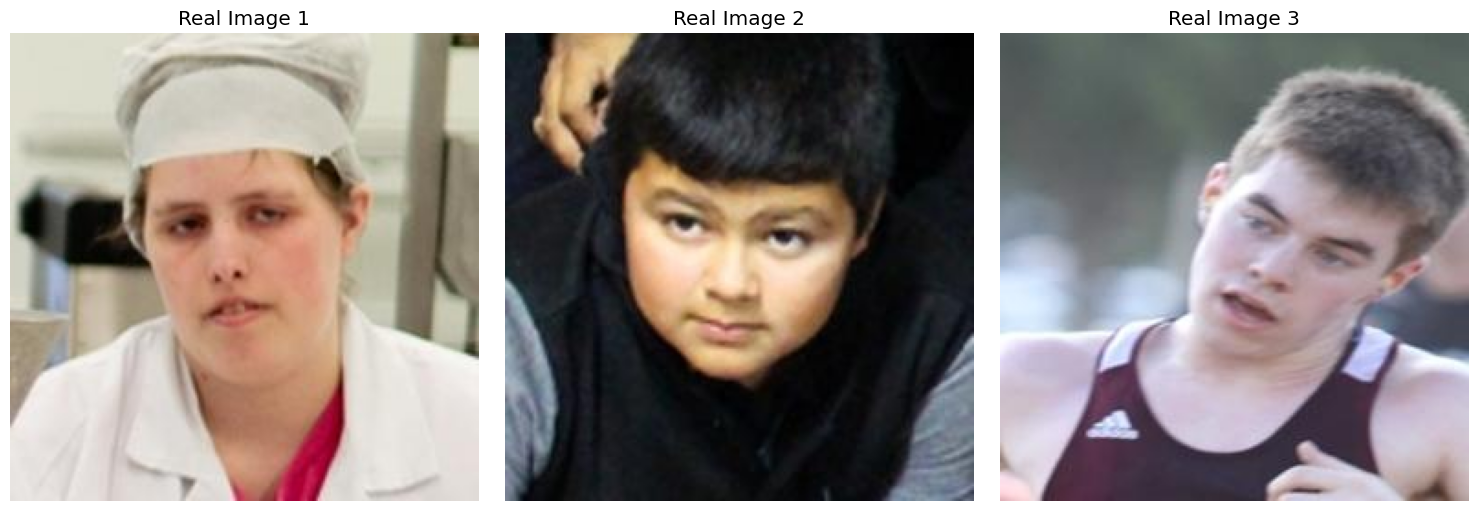

Sample Fake Images:


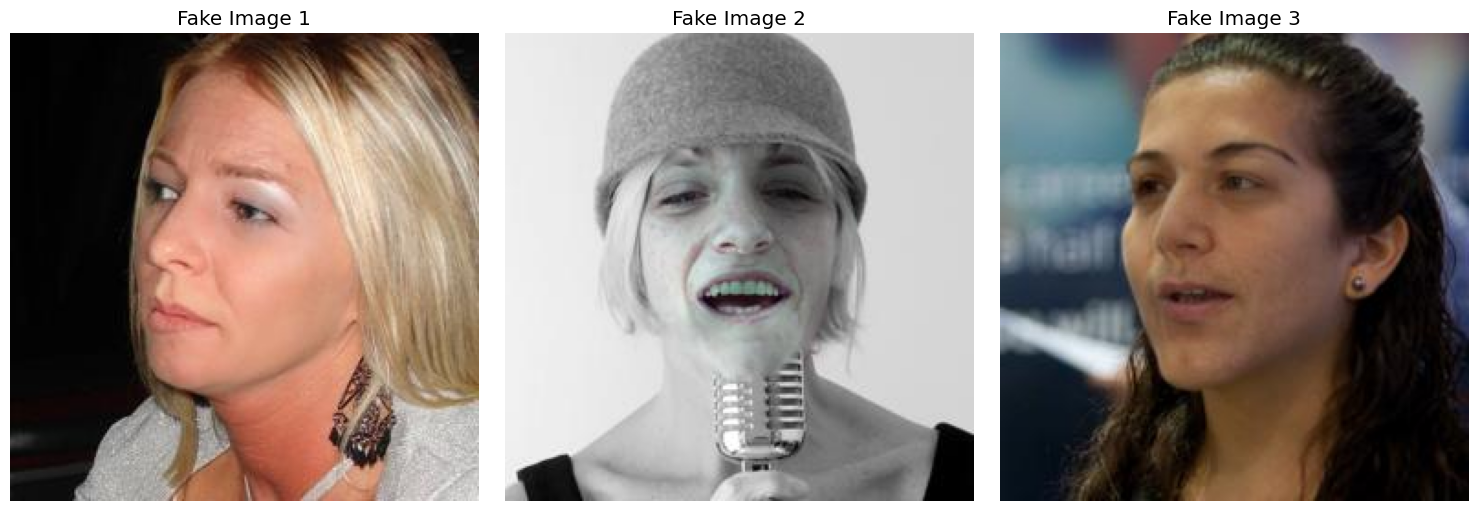

In [23]:
# Display sample images from each class
def display_sample_images(df, label, n=3):
    sample = df[df['label'] == label].sample(n=min(n, len(df[df['label'] == label])), random_state=42)
    
    plt.figure(figsize=(15, 5))
    for i, (_, row) in enumerate(sample.iterrows()):
        img = plt.imread(row['image_path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{label} Image {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'sample_{label.lower()}_images.png')
    plt.show()

# Display real images
print("Sample Real Images:")
display_sample_images(features_df, 'Real')

# Display fake images
print("Sample Fake Images:")
display_sample_images(features_df, 'Fake')

### Numerical Features
Let's visualize the distribution of numerical features.

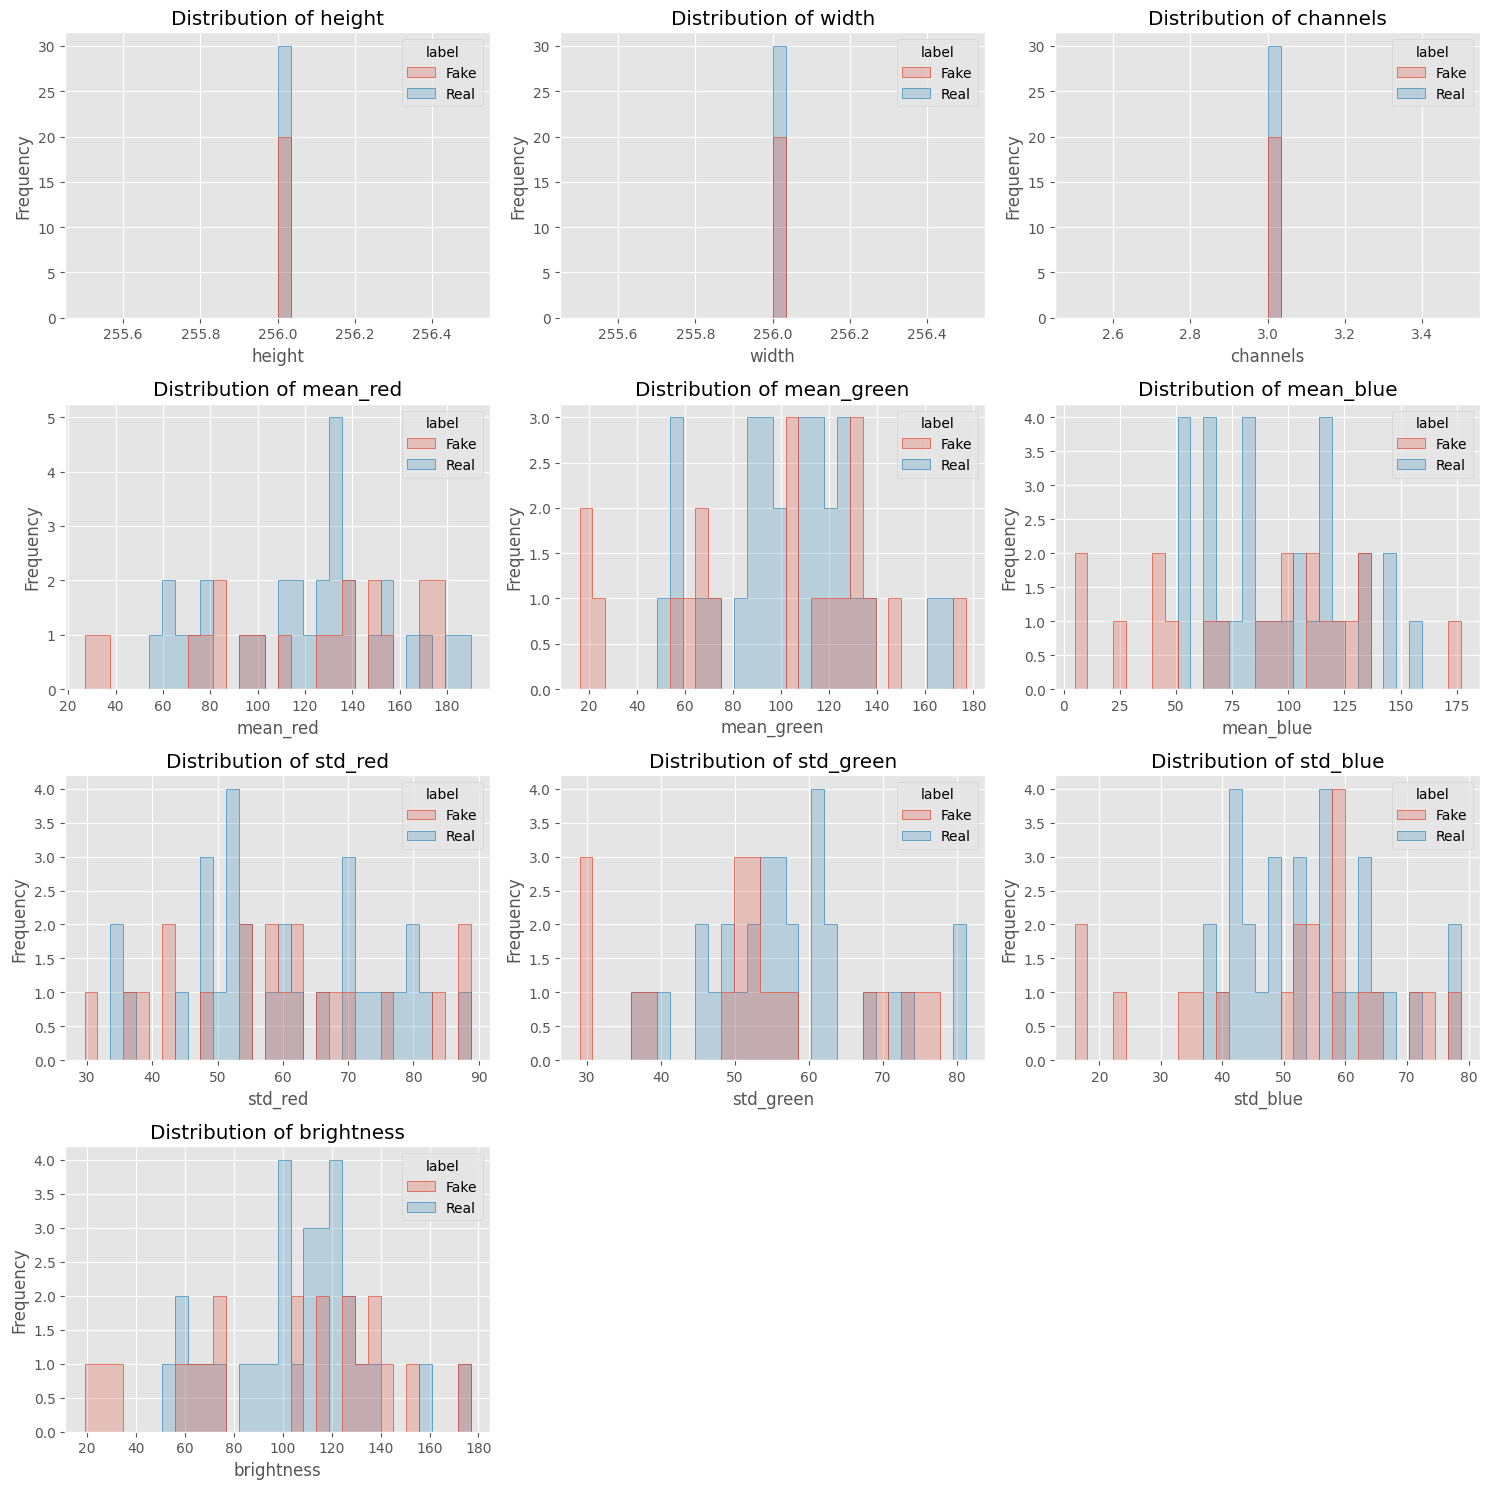

C:\Users\Dell\AppData\Local\Temp\ipykernel_17880\643603473.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=features_df, x=col, hue='label', fill=True, alpha=0.5)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17880\643603473.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=features_df, x=col, hue='label', fill=True, alpha=0.5)
C:\Users\Dell\AppData\Local\Temp\ipykernel_17880\643603473.py:25: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=features_df, x=col, hue='label', fill=True, alpha=0.5)


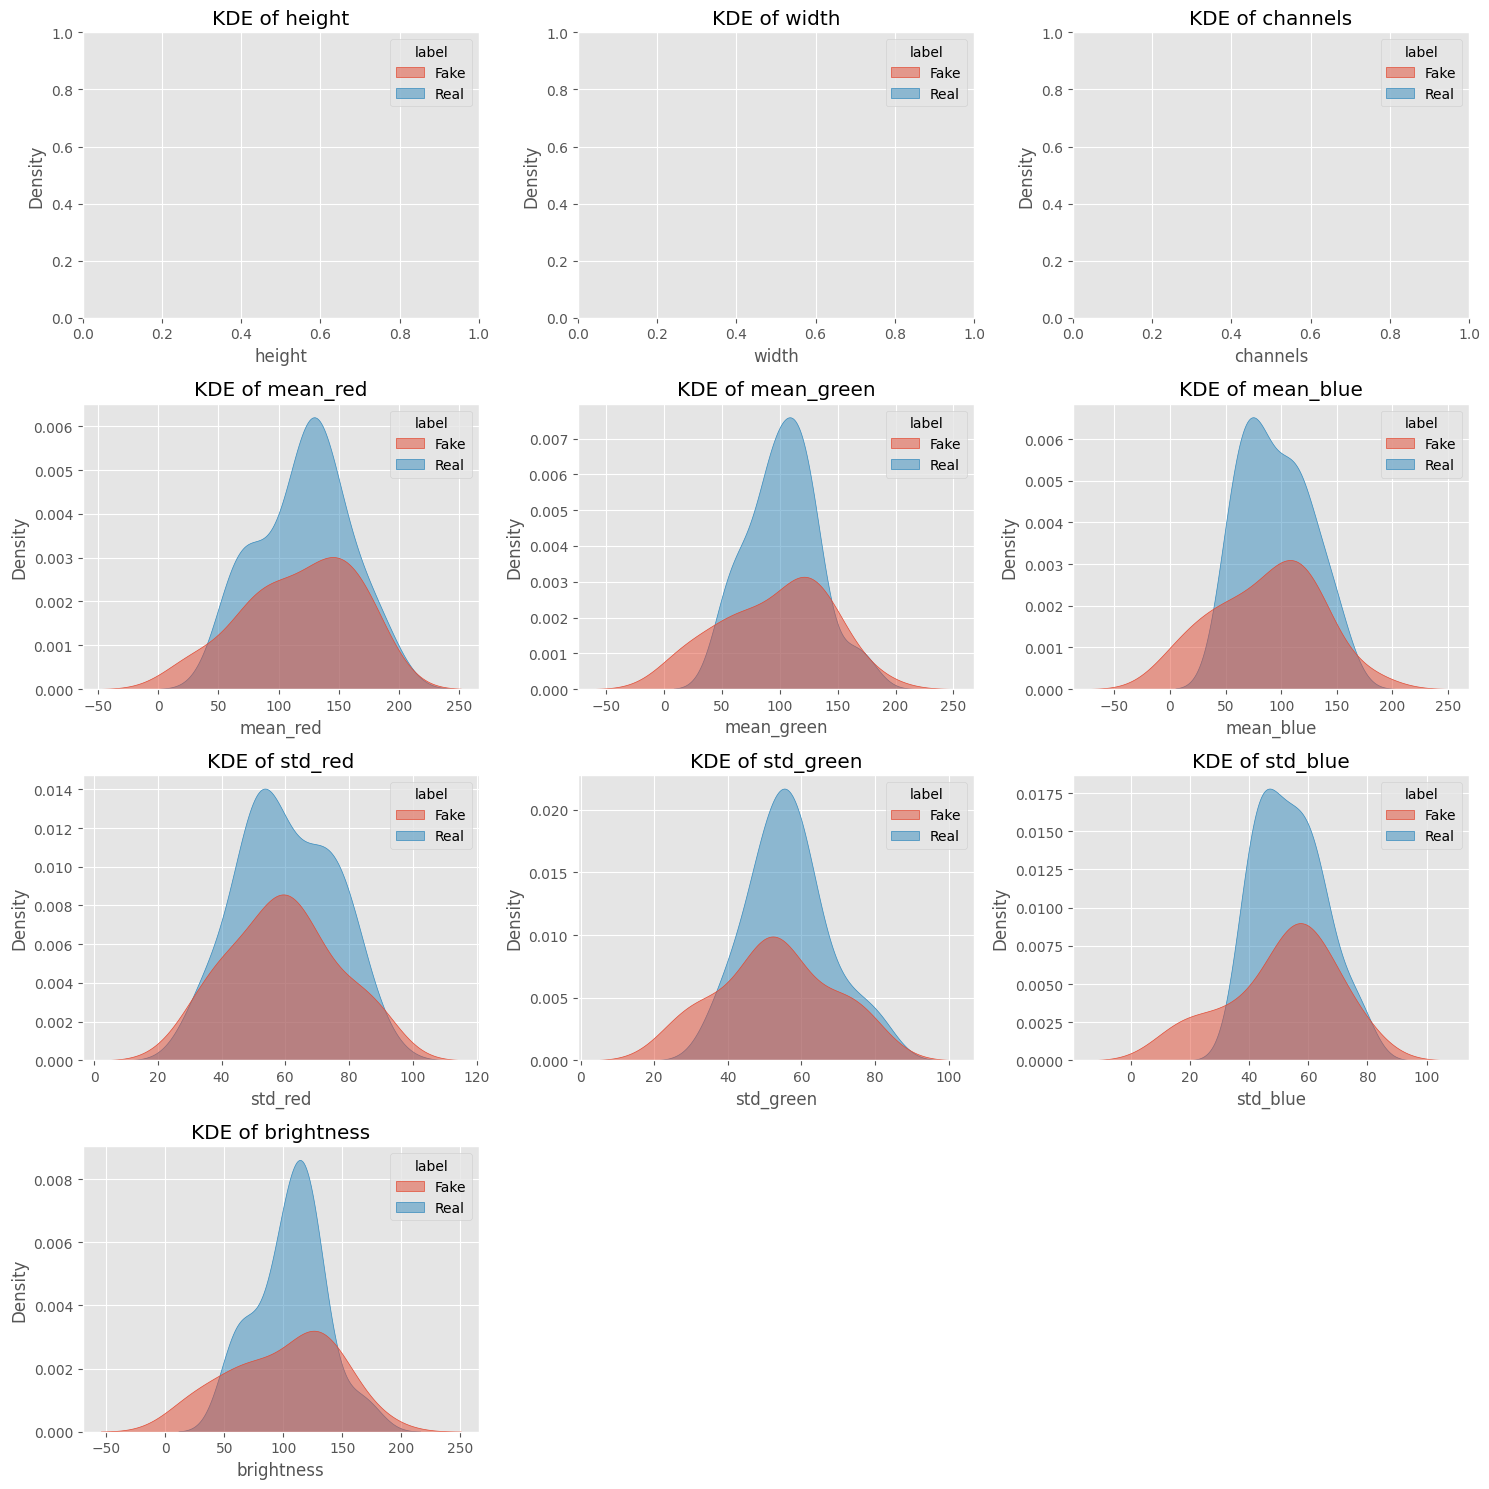

In [29]:
# Create histograms for numerical features
plt.figure(figsize=(15, 15))

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    # Avoid using kde=True which can cause LinAlgError with singular covariance matrix
    # Instead use bins for better visualization without density estimation
    sns.histplot(data=features_df, x=col, hue='label', element='step', 
                 common_norm=False, bins=30, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('histograms.png')
plt.show()

# If KDE visualization is still needed, we can add a separate plot with try-except
try:
    plt.figure(figsize=(15, 15))
    for i, col in enumerate(numerical_cols):
        plt.subplot(4, 3, i+1)
        # Try to plot with KDE but catch any LinAlgError
        try:
            sns.kdeplot(data=features_df, x=col, hue='label', fill=True, alpha=0.5)
            plt.title(f'KDE of {col}')
        except np.linalg.LinAlgError:
            plt.text(0.5, 0.5, f"KDE failed for {col}\n(singular covariance matrix)", 
                     ha='center', va='center', transform=plt.gca().transAxes)
        plt.xlabel(col)
    plt.tight_layout()
    plt.savefig('kde_plots.png')
    plt.show()
except:
    print("Could not generate KDE plots due to singular covariance matrices.")

### Categorical Features
Let's visualize the distribution of labels.

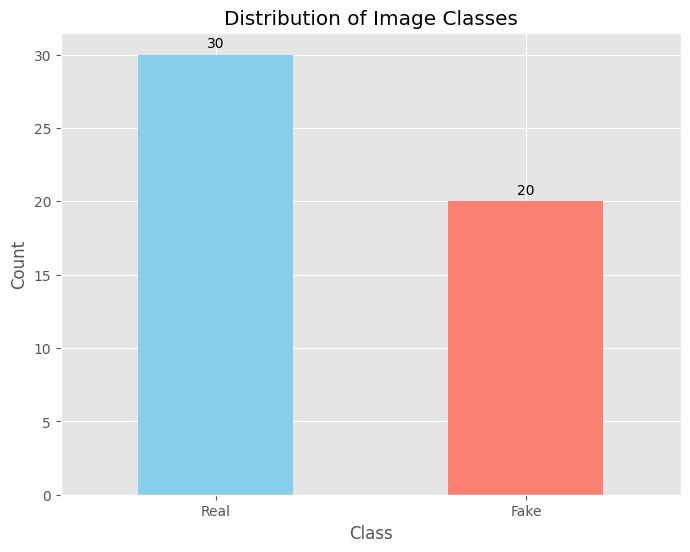

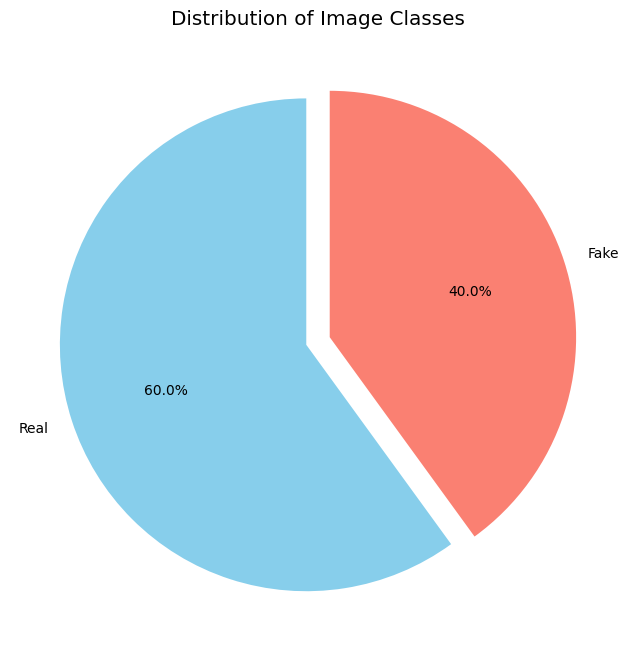

In [25]:
# Bar chart for label distribution
plt.figure(figsize=(8, 6))
counts = features_df['label'].value_counts()
counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Image Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')
plt.savefig('bar_chart.png')
plt.show()

# Pie chart for label distribution
plt.figure(figsize=(8, 8))
counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], explode=[0.05, 0.05])
plt.title('Distribution of Image Classes')
plt.ylabel('')  # Remove y-label
plt.savefig('pie_chart.png')
plt.show()

### Scatter Plots
Let's create scatter plots to visualize relationships between numerical features.

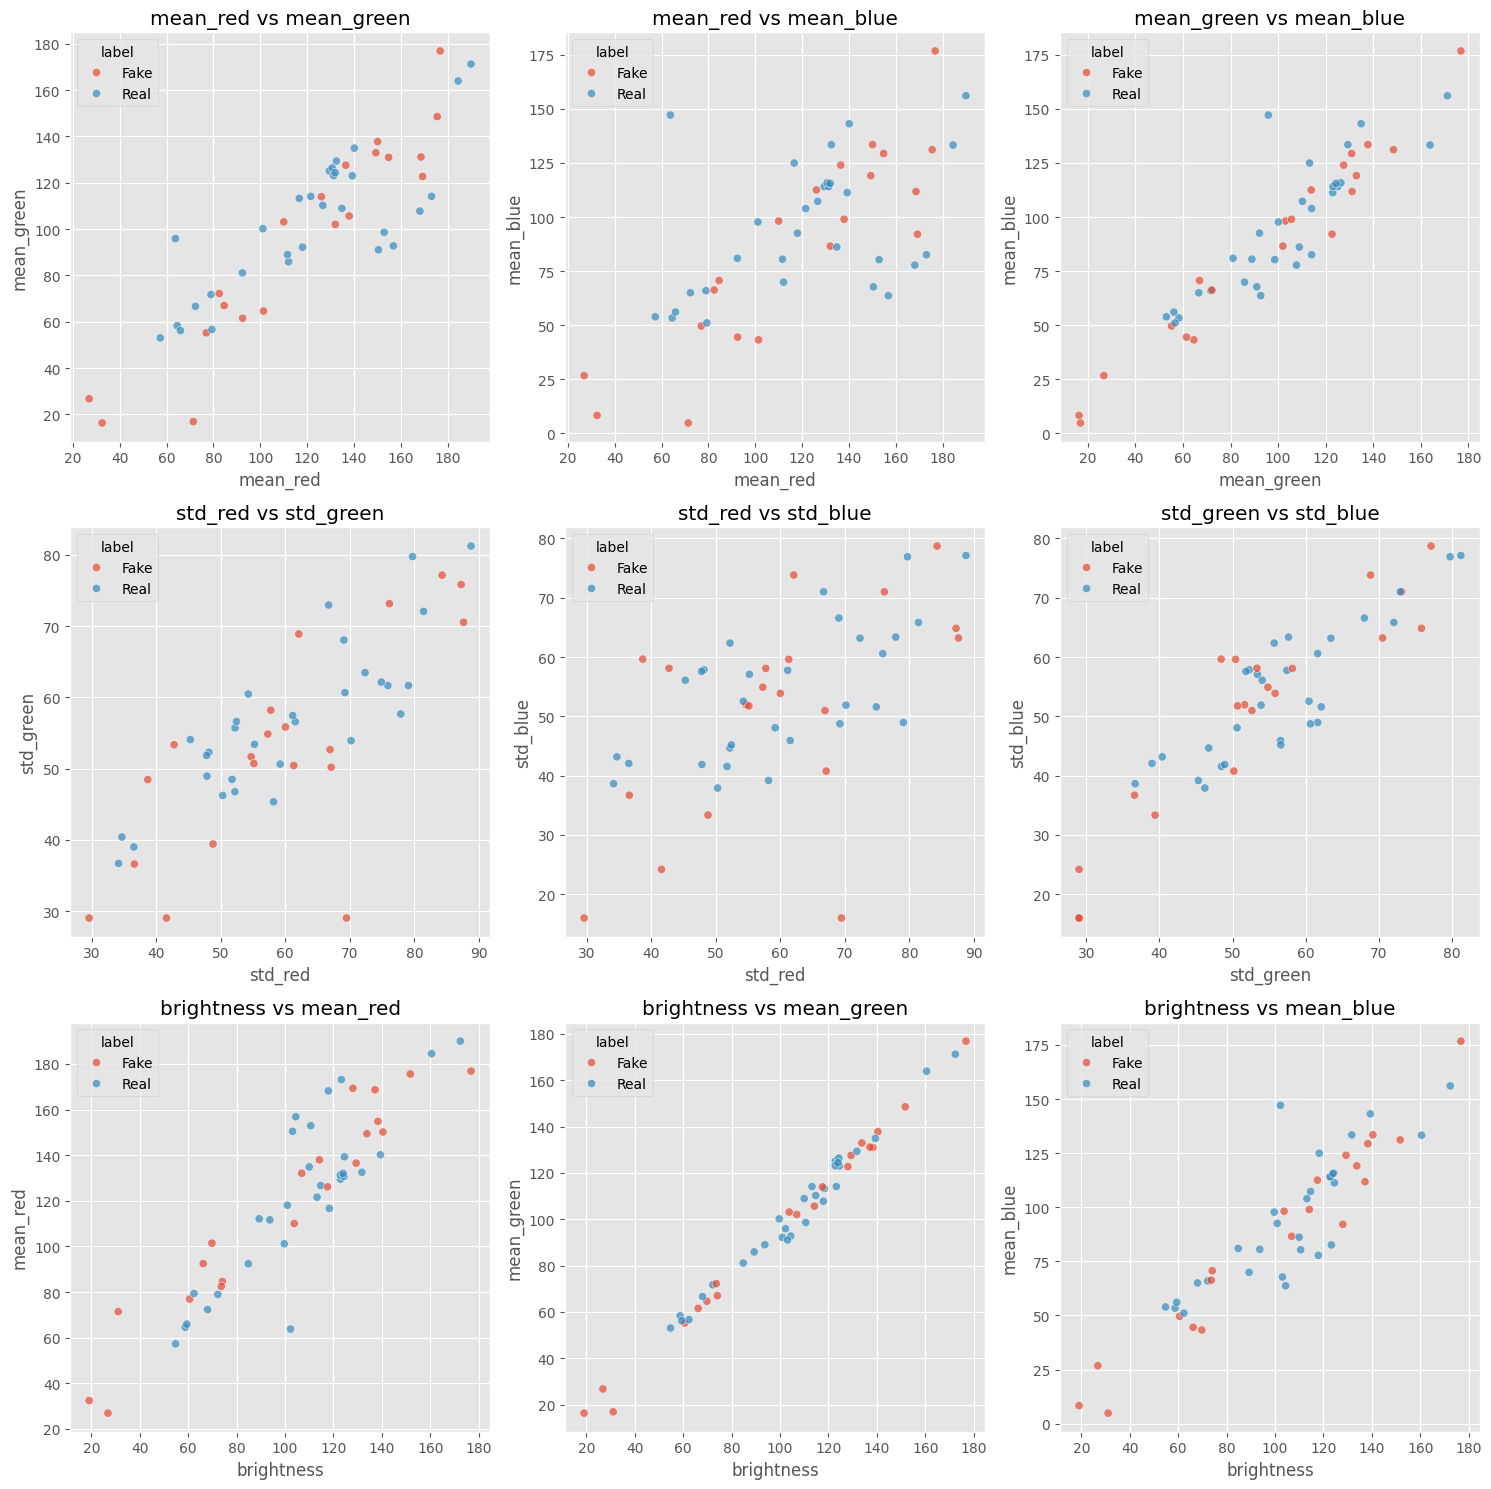

In [26]:
# Scatter plots of selected feature pairs
feature_pairs = [
    ('mean_red', 'mean_green'),
    ('mean_red', 'mean_blue'),
    ('mean_green', 'mean_blue'),
    ('std_red', 'std_green'),
    ('std_red', 'std_blue'),
    ('std_green', 'std_blue'),
    ('brightness', 'mean_red'),
    ('brightness', 'mean_green'),
    ('brightness', 'mean_blue')
]

plt.figure(figsize=(15, 15))

for i, (x_col, y_col) in enumerate(feature_pairs):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(data=features_df, x=x_col, y=y_col, hue='label', alpha=0.7)
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

plt.tight_layout()
plt.savefig('scatter_plots.png')
plt.show()

### Correlation Analysis
Let's analyze the correlation between numerical features.

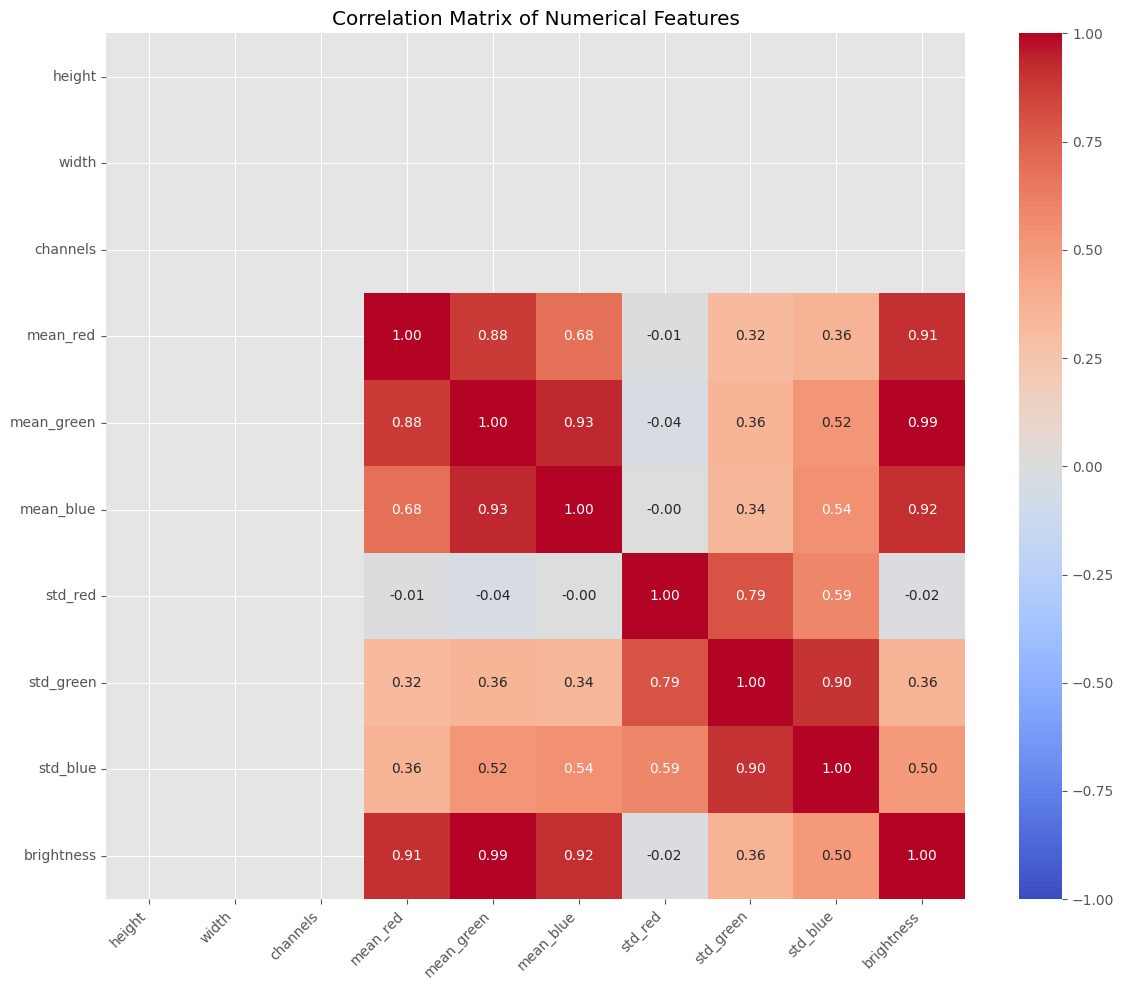

In [27]:
# Calculate correlation matrix
correlation_matrix = features_df[numerical_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_matrix.png')
plt.show()

### Pair Plots
Let's create pair plots to visualize relationships between multiple features simultaneously.

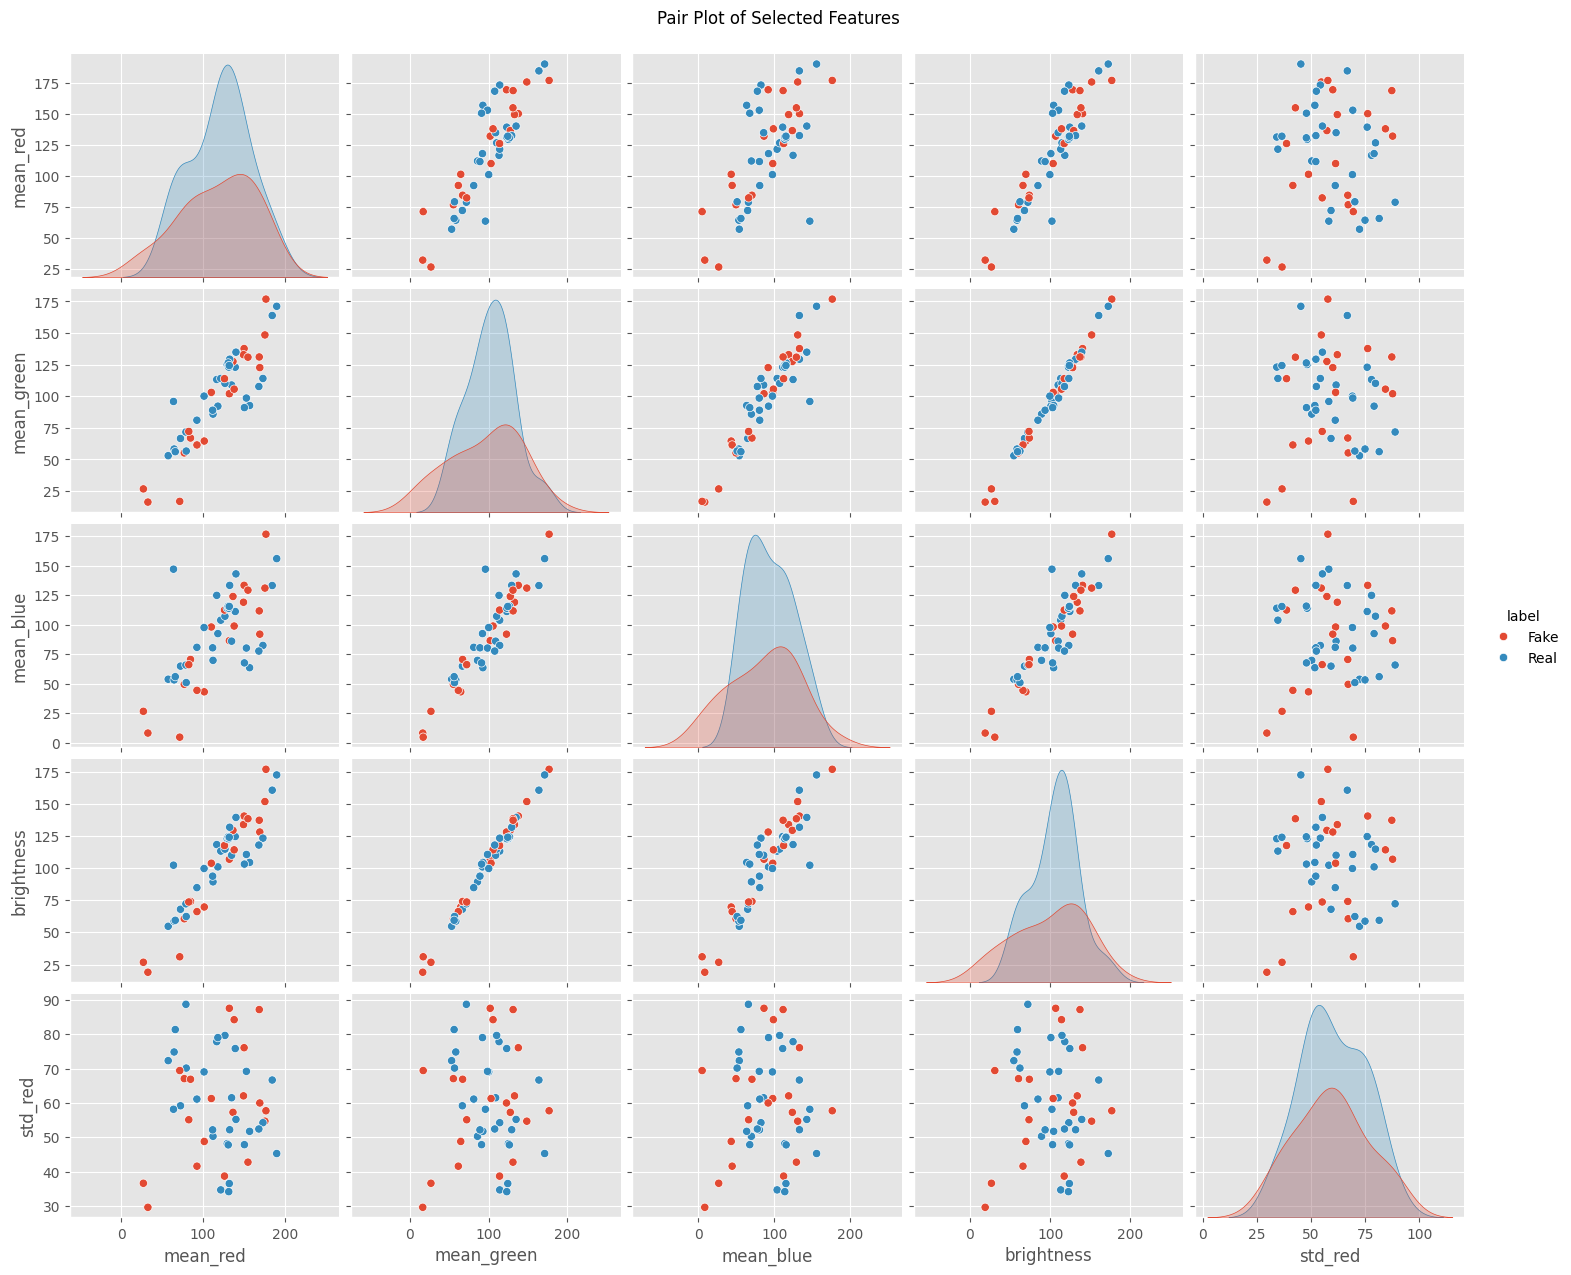

In [28]:
# Create pair plots for selected features
selected_features = ['mean_red', 'mean_green', 'mean_blue', 'brightness', 'std_red']
pair_plot = sns.pairplot(features_df, vars=selected_features, hue='label', diag_kind='kde', height=2.5, aspect=1.2)
plt.suptitle('Pair Plot of Selected Features', y=1.02)
pair_plot.savefig('pair_plot.png')
plt.show()

## 4. Methodology

Based on our initial exploration of the deepfake detection dataset, we propose the following methodology for further analysis:

### Problem Statement
This is a binary classification problem where the goal is to classify facial images as either real or fake (deepfake).

### Dataset Expansion
- Our current dataset sample size is somewhat limited. We'll need to expand it by incorporating more images from both classes to improve model generalization.

### Feature Engineering
- Extract more advanced features from the images, such as:
  - Facial landmarks (eyes, nose, mouth positions)
  - Texture descriptors (LBP, GLCM features)
  - Frequency domain features (using FFT or Wavelets)
  - Edge detection and analysis

### Proposed Model
Given the nature of the problem (image classification), we propose using a Convolutional Neural Network (CNN) approach:

1. **Deep Learning Architecture**: A CNN model with multiple convolutional layers followed by dense layers.
   - Pre-trained models like VGG16, ResNet, or EfficientNet can be used as feature extractors.
   - Transfer learning will be employed to leverage knowledge from pre-trained models.

2. **Data Augmentation**: To increase the diversity of training data, we'll apply:
   - Random horizontal flips
   - Slight rotations
   - Brightness and contrast adjustments
   - Random crops

3. **Regularization Techniques**: To prevent overfitting, we'll use:
   - Dropout layers
   - Batch normalization
   - Early stopping
   - L2 regularization

### Evaluation Metrics
The model's performance will be evaluated using:
- Accuracy: Overall correctness of the model
- Precision and Recall: To handle potential class imbalance
- F1-Score: Harmonic mean of precision and recall
- ROC-AUC: Area under the ROC curve to evaluate the model's ability to discriminate between classes
- Confusion Matrix: To visualize true positives, false positives, true negatives, and false negatives

### Interpretation and Explainability
To understand what features the model uses to make predictions, we'll incorporate:
- Grad-CAM (Gradient-weighted Class Activation Mapping) to visualize important regions in the images
- SHAP (SHapley Additive exPlanations) values to interpret feature importance

This comprehensive approach will enable us to build a robust deepfake detection model while gaining insights into the distinguishing characteristics between real and fake facial images. 